In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid
from pyinverse.rect import srect_2D_proj_ramp
from pyinverse.radon import radon_matrix
from pyinverse.fbp import BackProjector

In [3]:
Nx = 256
Ny = 256
Na = 1
Np = 300

In [4]:
theta0_deg = 22.5
#theta0_deg = 0
theta0_rad = np.radians(theta0_deg)

In [5]:
axis_x = RegularAxis.linspace(-1, 1, Nx)
axis_y = RegularAxis.linspace(-1, 1, Ny)
axis_t = RegularAxis.linspace(-1, 1, Np)
axis_theta = RegularAxis.linspace(theta0_deg, 180, Na, endpoint=False)

In [6]:
grid = RegularGrid(axis_x, axis_y)
grid_y = RegularGrid(axis_theta, axis_t)

In [7]:
proj_ramp = srect_2D_proj_ramp([theta0_rad], axis_t.centers, 1, 1)

<IPython.core.display.Javascript object>


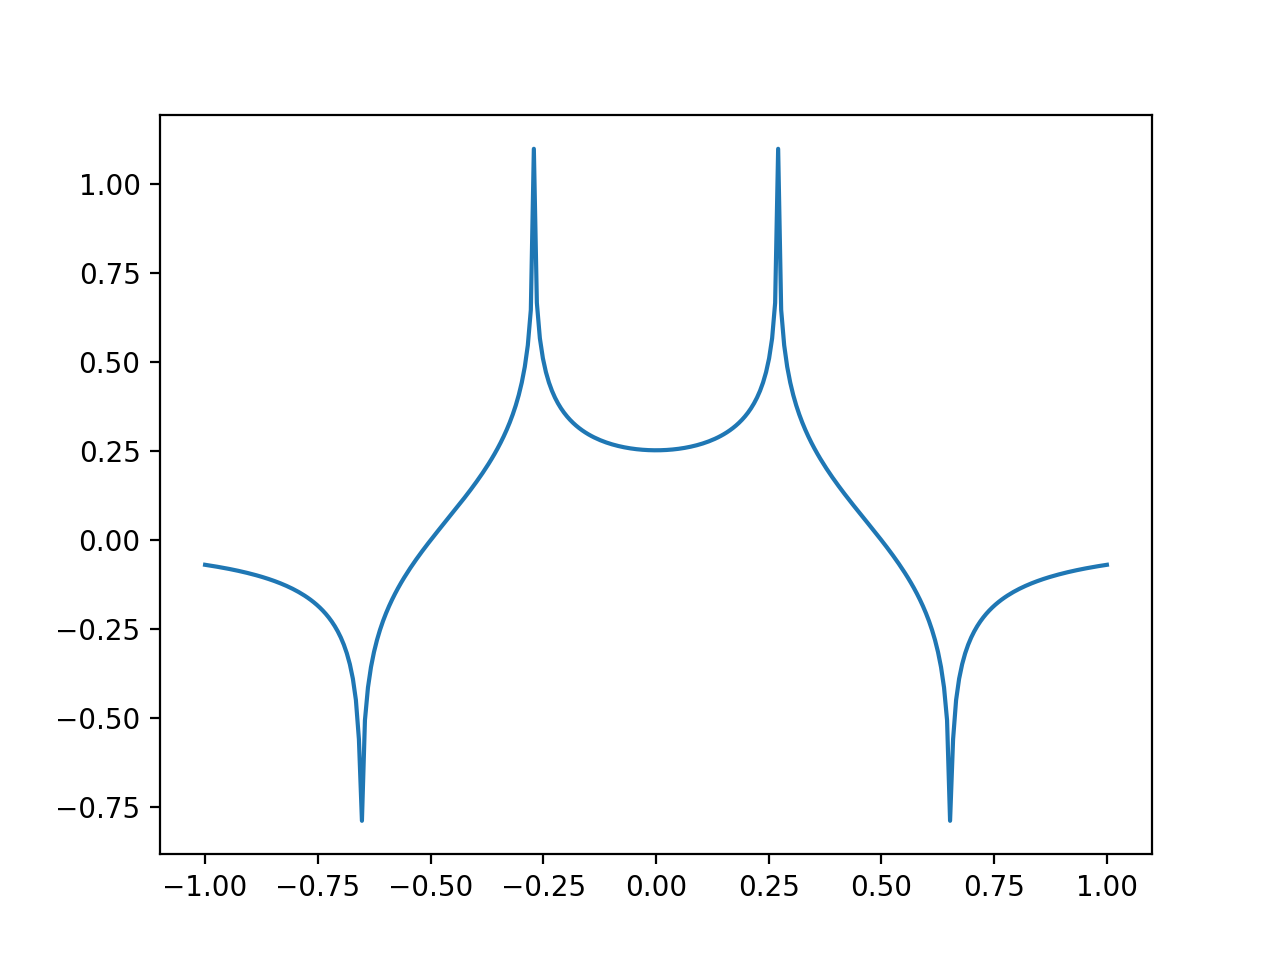

In [8]:
fig, ax = plt.subplots()
ax.plot(axis_t.centers, proj_ramp)

In [9]:
X, Y = np.meshgrid(grid.axis_x.centers, grid.axis_y.centers)
t_theta_k = X * np.cos(theta0_rad) + Y * np.sin(theta0_rad)
S_k = np.interp(t_theta_k.flat, axis_t.centers, proj_ramp.flat, left=np.nan, right=np.nan)

In [10]:
S_k.shape = grid.shape

<IPython.core.display.Javascript object>


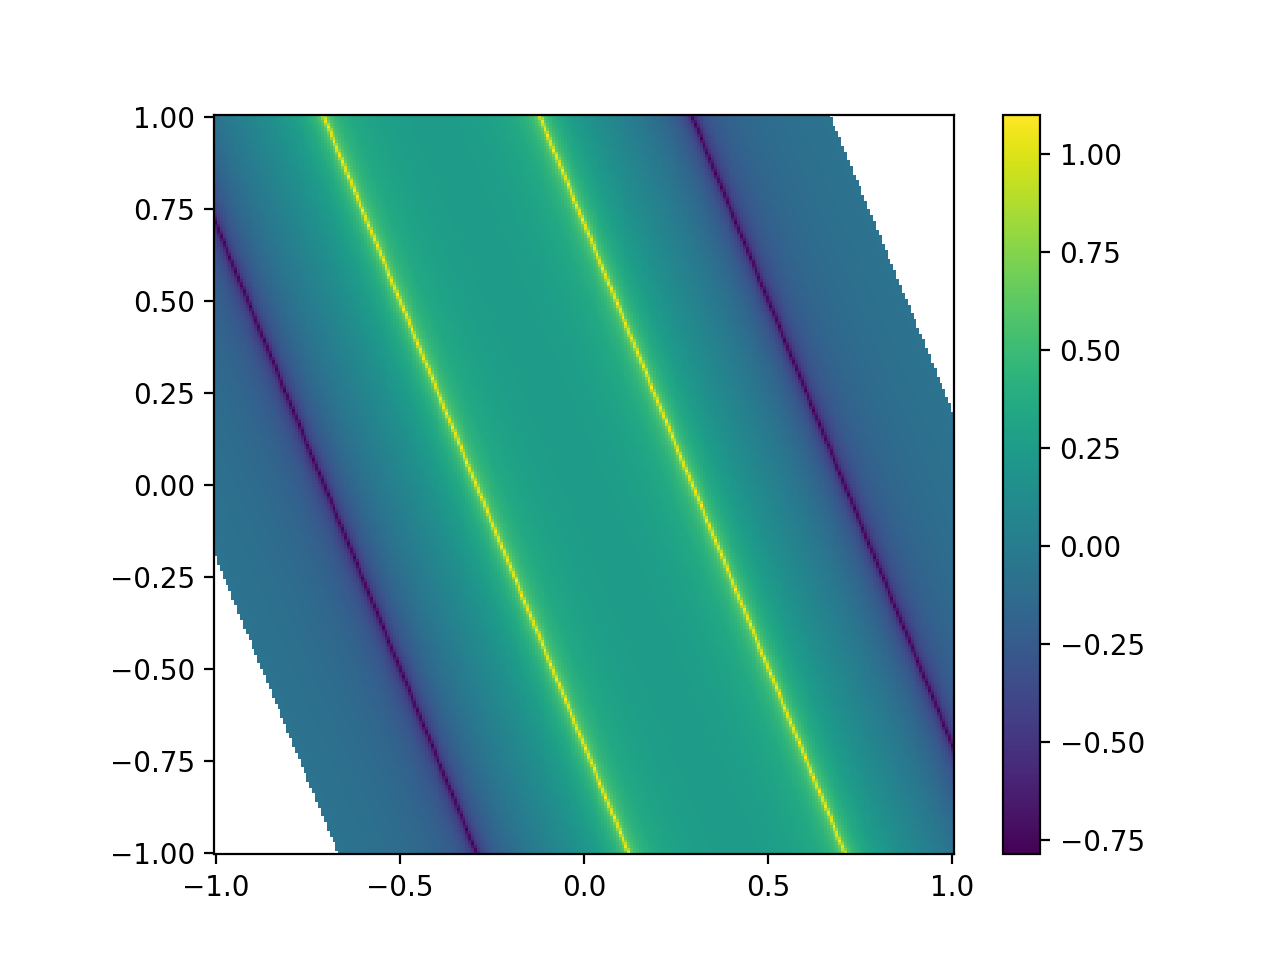

In [11]:
fig, ax = plt.subplots()
im = grid.plot(ax, S_k)
fig.colorbar(im, ax=ax);

In [12]:
bp = BackProjector(grid, grid_y, a=1/grid_y.axis_y.T)

100%|███████████████████████████████████████████████████████████████| 256/256 [00:17<00:00, 14.68it/s]


In [13]:
S_matrix = bp[0] @ proj_ramp
S_matrix.shape = grid.shape

<IPython.core.display.Javascript object>


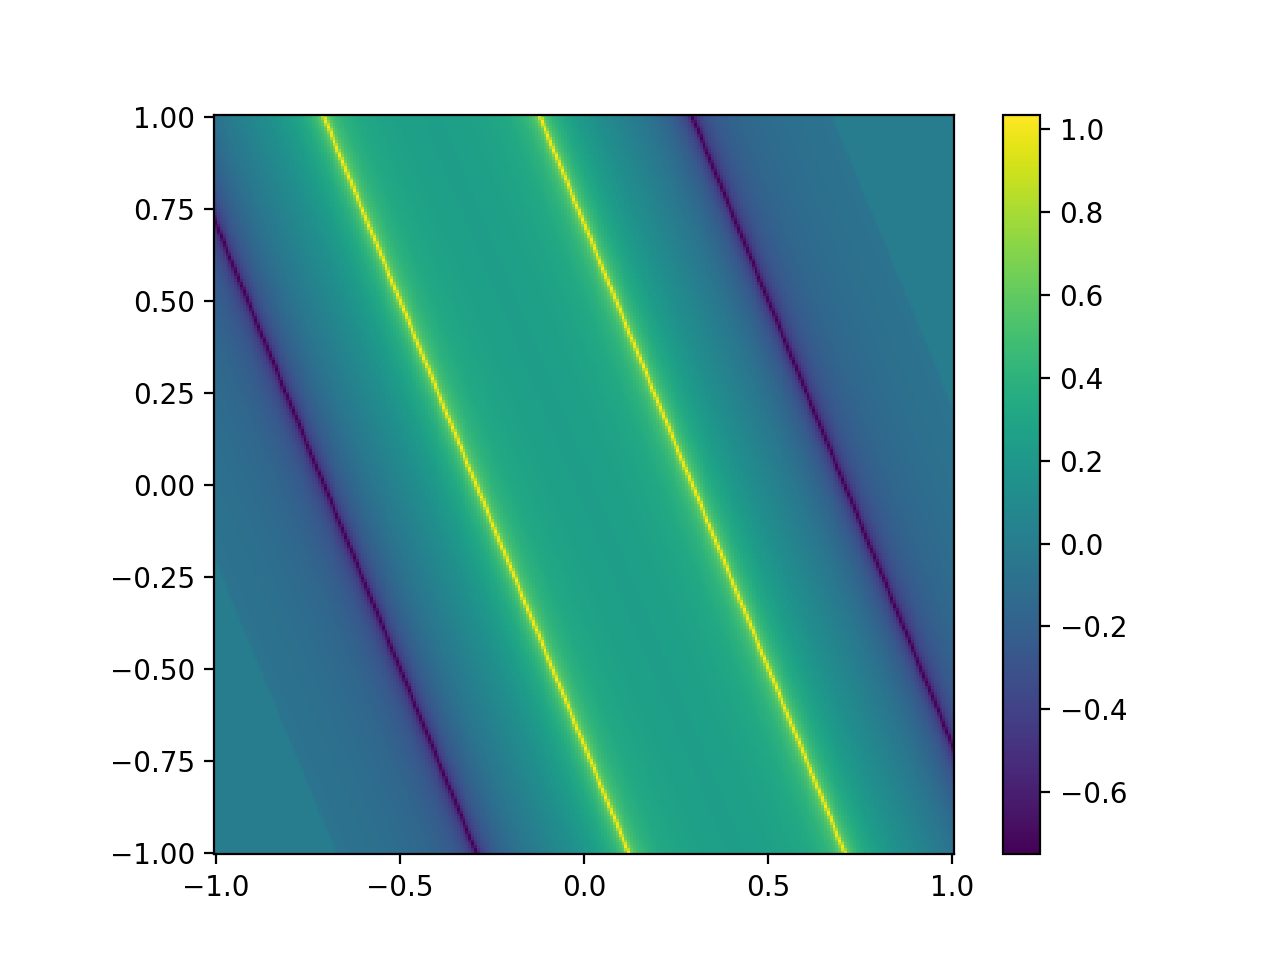

In [14]:
fig, ax = plt.subplots()
im = grid.plot(ax, S_matrix)
fig.colorbar(im, ax=ax);